# Activation functions in Neural Networks

In [1]:
import tensorflow as tf 
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np 
import matplotlib.pyplot as plt 

print (tf.__version__) # 1.12.0

Using TensorFlow backend.


1.10.0


### Loading the fashion MNIST data

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
# returns 4 numpy arrays: 2 training sets and 2 test sets
# images: 28x28 arrays, pixel values: 0 to 255
# labels: array of integers: 0 to 9 => class of clothings
# Training set: 60,000 images, Testing set: 10,000 images

# class names are not included, need to create them to plot the images  
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


### Normalizing the data 


In [4]:
# scale the values to a range of 0 to 1 of both data sets
train_images = train_images / 255.0
test_images = test_images / 255.0

### Comparing Activation functions

In [9]:
# 1. ReLu
# Model a simple 3-layer neural network
model_3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model_3.summary() 


In [ ]:
# Compile the model, specify: optimizer, loss function metrics
model_3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
history=model_3.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

test_loss, test_acc = model_3.evaluate(test_images, test_labels)
print("Model - 3 layers - test loss:", test_loss * 100)
print("Model - 3 layers - test accuracy:", test_acc * 100)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [5]:
# A simple 3-layer neural network
# Activation function: sigmoid
model_3_sigmoid = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.sigmoid),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model_3_sigmoid.summary() 

# Compile the model, specify: optimizer, loss function, metrics
model_3_sigmoid.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [6]:
model_3_sigmoid.fit(train_images, train_labels, epochs=5)

test_loss, test_acc = model_3_sigmoid.evaluate(test_images, test_labels)
print("Model - 3 layers sigmoid - test loss:", test_loss * 100)
print("Model - 3 layers sigmoid - test accuracy:", test_acc * 100)

Epoch 1/5
60000/60000 [==============================] - 7s 112us/step - loss: 1.8507 - acc: 0.4552
Epoch 2/5
60000/60000 [==============================] - 6s 107us/step - loss: 1.0686 - acc: 0.6744
Epoch 3/5
60000/60000 [==============================] - 6s 103us/step - loss: 0.8124 - acc: 0.7265
Epoch 4/5
60000/60000 [==============================] - 7s 119us/step - loss: 0.7096 - acc: 0.7494
Epoch 5/5
10000/10000 [==============================] - 1s 56us/step
Model - 3 layers sigmoid - test loss: 65.07541139602662
Model - 3 layers sigmoid - test accuracy: 76.19


In [7]:
# A simple 3-layer neural network
# Activation function: tanh
model_3_tanh = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.tanh),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model_3_tanh.summary() 

# Compile the model, specify: optimizer, loss function metrics
model_3_tanh.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_3_tanh.fit(train_images, train_labels, epochs=5)


test_loss, test_acc = model_3_tanh.evaluate(test_images, test_labels)
print("Model - 3 layers tanh - test loss:", test_loss * 100)
print("Model - 3 layers tanh - test accuracy:", test_acc * 100)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 47us/step - loss: 1.4625 - acc: 0.5693 - val_loss: 0.9395 - val_acc: 0.7010
Epoch 2/20
60000/60000 [==============================] - 3s 42us/step - loss: 0.7812 - acc: 0.7385 - val_loss: 0.7015 - val_acc: 0.7534
Epoch 3/20
60000/60000 [==============================] - 3s 43us/step - loss: 0.6448 - acc: 0.7711 - val_loss: 0.6250 - val_acc: 0.7762
Epoch 4/20
60000/60000 [==============================] - 2s 40us/step - loss: 0.5854 - acc: 0.7922 - val_loss: 0.5816 - val_acc: 0.7903
Epoch 5/20
60000/60000 [==============================] - 3s 46us/step - loss: 0.5477 - acc: 0.8069 - val_loss: 0.5544 - val_acc: 0.8040
Epoch 6/20
60000/60000 [==============================] - 2s 36us/step - loss: 0.5215 - acc: 0.8177 - val_loss: 0.5350 - val_acc: 0.8089
Epoch 7/20
60000/60000 [==============================] - 3s 44us/step - loss: 0.5021 - acc: 0.8241 - val_loss: 0.5197 - val_acc

60000/60000 [==============================] - 3s 44us/step - loss: 0.5640 - acc: 0.7978 - val_loss: 0.5785 - val_acc: 0.7896
Epoch 20/20
60000/60000 [==============================] - 3s 51us/step - loss: 0.5557 - acc: 0.8010 - val_loss: 0.5720 - val_acc: 0.7954
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 61us/step - loss: 1.4640 - acc: 0.5839 - val_loss: 0.9360 - val_acc: 0.6981
Epoch 2/20
60000/60000 [==============================] - 2s 36us/step - loss: 0.7753 - acc: 0.7407 - val_loss: 0.6971 - val_acc: 0.7489
Epoch 3/20
60000/60000 [==============================] - 2s 35us/step - loss: 0.6418 - acc: 0.7713 - val_loss: 0.6235 - val_acc: 0.7735
Epoch 4/20
60000/60000 [==============================] - 2s 36us/step - loss: 0.5835 - acc: 0.7917 - val_loss: 0.5819 - val_acc: 0.7865
Epoch 5/20
60000/60000 [==============================] - 2s 39us/step - loss: 0.5463 - acc: 0.8078 - val_loss: 0.5540 - val_acc: 0.8025
E

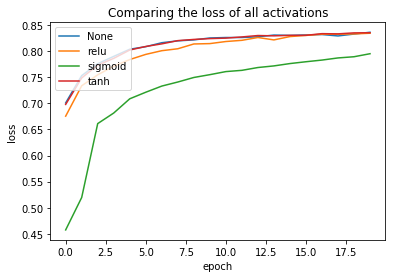

In [8]:
# Combine the networks using all activations
epochs = 25

for activation in [None, 'relu', 'sigmoid', 'tanh']:
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    model.add(keras.layers.Dense(128,activation=activation))
    model.add(keras.layers.Dense(10, activation='softmax'))
    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    history=model.fit(train_images, train_labels,
                     batch_size=128,
                     epochs=20,
                     verbose=1,
                     validation_data=(test_images, test_labels))
    plt.plot(history.history['val_acc'])
    
plt.title('Comparing the loss of all activations')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['None', 'relu', 'sigmoid', 'tanh'], loc="upper left")